<a href="https://colab.research.google.com/github/arnavjune2/Digit-Recognizer/blob/main/DataReco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

'2.8.0'

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [41]:
train_data = pd.read_csv('/content/drive/MyDrive/kaggle digit recognizer/train.csv')

In [44]:
train_data.shape

(42000, 785)

if is a 6


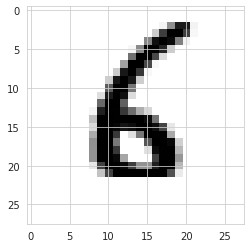

In [77]:
img = train_data.iloc[45,1:].values.reshape(28,28)
plt.imshow(img,  cmap="binary")
print(f"if is a {train_data.iloc[45,0]}")

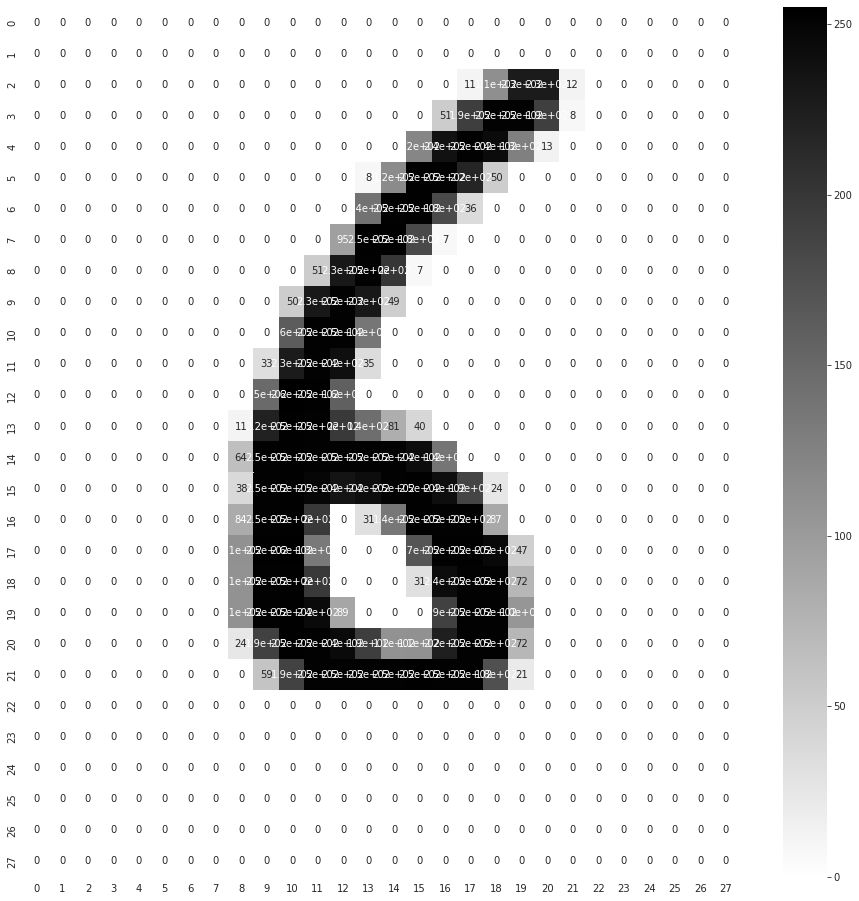

In [80]:
plt.figure(figsize=(16,16))
sns.heatmap(data=img, annot=True,cmap='binary')

In [71]:

X_train= train_data.drop(columns= ['label'])[:40000]/255 #also applying the standardisation
y_train= train_data.label[:40000]
X_val= train_data.drop(columns= ['label'])[40000:]/255 #also applying the standardisation
y_val= train_data.label[40000:]

In [73]:
X_train.shape

(40000, 784)

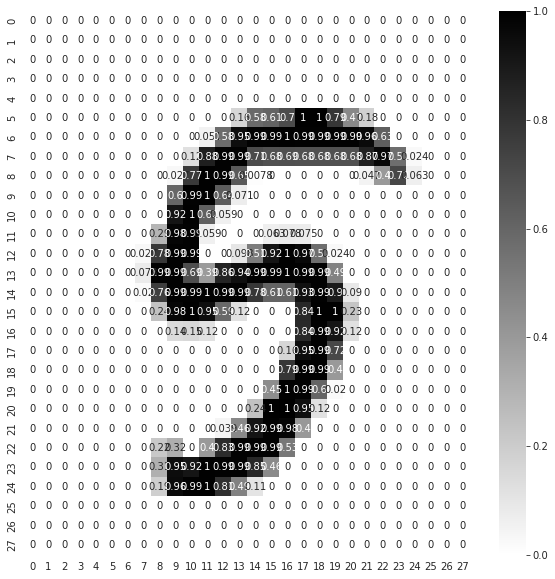

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(data=X_train[8:9].values.reshape(28,28), annot=True,cmap='binary')

In [82]:
X_train.shape

(40000, 784)

In [84]:
CLASSES = 10
LAYERS =[
         tf.keras.layers.InputLayer(input_shape=(784,), name="inputLayer"),
         tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1"),
         tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2"),
         tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer")

]

In [85]:
model_clf = tf.keras.Sequential(LAYERS)

In [86]:
model_clf.layers

In [87]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [89]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]
model_clf.compile(loss= LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics= METRICS)

In [90]:
EPOCHES = 30
VALIDATION = (X_val, y_val)

model_clf.fit(X_train, y_train, epochs=EPOCHES, validation_data=VALIDATION)

Epoch 1/30
1250/1250 [==============================] - 7s 3ms/step - loss: 0.6725 - accuracy: 0.8265 - val_loss: 0.3712 - val_accuracy: 0.9015
Epoch 2/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3091 - accuracy: 0.9107 - val_loss: 0.3073 - val_accuracy: 0.9155
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2564 - accuracy: 0.9260 - val_loss: 0.2710 - val_accuracy: 0.9235
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2228 - accuracy: 0.9365 - val_loss: 0.2444 - val_accuracy: 0.9290
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1978 - accuracy: 0.9439 - val_loss: 0.2249 - val_accuracy: 0.9385
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1780 - accuracy: 0.9485 - val_loss: 0.2108 - val_accuracy: 0.9410
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1610 - accuracy: 0.9542 - val_loss: 0.1910 - val_accuracy:

In [91]:
model_clf.save("digit.h5")

In [92]:
test = pd.read_csv("/content/drive/MyDrive/kaggle digit recognizer/test.csv")

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [96]:
y_predict = model_clf.predict(test)

7


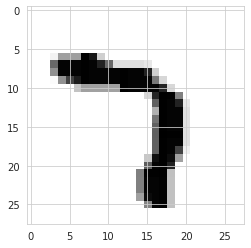

In [104]:
img = test.iloc[45,:].values.reshape(28,28)
plt.imshow(img, cmap='binary')
print(np.argmax(y_predict[45]))

0


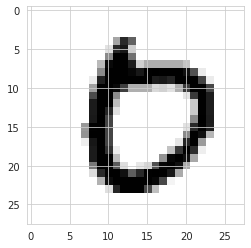

In [105]:
img = test.iloc[1000,:].values.reshape(28,28)
plt.imshow(img, cmap='binary')
print(np.argmax(y_predict[1000]))

2


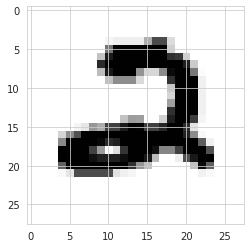

In [125]:
img = test.iloc[0,:].values.reshape(28,28)
plt.imshow(img, cmap='binary')
print(np.argmax(y_predict[0]))

In [108]:
y_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [118]:
label = []
for i in y_predict:
  label.append(np.argmax(i))


In [130]:
my_submission = pd.DataFrame({'ImageId': list(range(1, len(label)+1)), 'Label':label})
my_submission.to_csv('submission.csv', index=False)